In [ ]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
 extracting: data/images/001cell.png  
 extracting: data/images/002cell.png  
 extracting: data/images/003cell.png  
 extracting: data/images/004cell.png  
 extracting: data/images/005cell.png  
 extracting: data/images/006cell.png  
 extracting: data/images/007cell.png  
 extracting: data/images/008cell.png  
 extracting: data/images/009cell.png  
 extracting: data/images/010cell.png  
 extracting: data/images/011cell.png  
 extracting: data/images/012cell.png  
 extracting: data/images/013cell.png  
 extracting: data/images/014cell.png  
 extracting: data/images/015cell.png  
 extracting: data/images/016cell.png  
 extracting: data/images/017cell.png  
 extracting: data/images/018cell.png  
 extracting: data/images/019cell.png  
 extracting: data/images/020cell.png  
 extracting: data/images/021cell.png  
 extracting: data/images/022cell.png  
 extracting: data/images/023cell.png  
 extracting: data/images/024cell.png  


In [ ]:
import glob
import cv2
import numpy as np
import keras
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [ ]:
cv_img = []

for img in glob.glob("data/labels/*.png"):
    n= cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
    k = np.sum(n)
    cv_img.append(int(k/76))

In [ ]:
y = np.array(cv_img)

In [ ]:
y.shape

(200,)

In [ ]:
x_img = []

for img in glob.glob("data/labels/*.png"):
    n= cv2.imread(img)
    n = cv2.cvtColor(n, cv2.COLOR_BGR2GRAY)
    x_img.append(n)

In [ ]:
X = np.array(x_img)

In [ ]:
X = X.reshape(200, 256, 256, 1)

In [ ]:
X.shape

(200, 256, 256, 1)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class PlotLosses(keras.callbacks.Callback):
    def __init__(self, plot_interval=1, evaluate_interval=10, x_val=None, y_val_categorical=None):
        self.plot_interval = plot_interval
        self.evaluate_interval = evaluate_interval
        self.x_val = x_val
        self.y_val_categorical = y_val_categorical
    def on_train_begin(self, logs={}):
        print('Begin training')
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.logs = []
    def on_epoch_end(self, epoch, logs={}):
        if self.evaluate_interval is None:
            self.logs.append(logs)
            self.x.append(self.i)
            self.losses.append(logs.get('loss'))
            self.val_losses.append(logs.get('val_loss'))
            self.acc.append(logs.get('accuracy'))
            self.val_acc.append(logs.get('val_accuracy'))
            self.i += 1
        if (epoch%self.plot_interval==0):
            clear_output(wait=True)
            f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(20,5))
            ax1.plot(self.x, self.losses, label="loss")
            ax1.plot(self.x, self.val_losses, label="val_loss")
            ax1.legend()
            ax2.plot(self.x, self.acc, label="acc")
            ax2.plot(self.x, self.val_acc, label="val_acc")
            ax2.legend()
            plt.show();
    def on_batch_end(self, batch, logs={}):
        if self.evaluate_interval is not None:
            if (batch%self.evaluate_interval==0):
                self.i += 1
                self.logs.append(logs)
                self.x.append(self.i)
                self.losses.append(logs.get('loss'))
                self.acc.append(logs.get('acc'))
                if self.x_val is not None:
                    score = self.model.evaluate(self.x_val, self.y_val_categorical, verbose=0)
                    self.val_losses.append(score[0])
                    self.val_acc.append(score[1])

In [ ]:
plot_losses = PlotLosses(plot_interval = 1, evaluate_interval = None)

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(256, 256, 1))

# ResNet is designed for images with 3 channels, 
# so we have to duplicate the grayscale channel

concat = keras.layers.Concatenate()([inputs, inputs, inputs])

vgg19 = keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    pooling='avg'
)(concat)

activation = keras.layers.Activation("relu")(vgg19)

output = keras.layers.Dense(1)(activation)

model = keras.Model(inputs, output)

model.layers[0].trainable = False

model.compile(loss='mse', 
              optimizer=keras.optimizers.Adam(0.000001), metrics=['accuracy'])

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
# TESTING PURPOSE
"""
tl_model = Sequential(name="transfer_learning_model")
inputs = keras.Input(shape=(256, 256, 1))

concat = keras.layers.Concatenate()([inputs, inputs, inputs])

# adding VGG19 without the top and pretrained weights
vgg19 = keras.applications.VGG19(
    include_top=False,
    weights='imagenet',
    pooling='avg'
)(concat)

tl_model.add(inputs)
tl_model.add(Model(inputs=transfer_learning_model.input, outputs=transfer_learning_model.get_layer(layer).output))
"""

'\ntl_model = Sequential(name="transfer_learning_model")\ninputs = keras.Input(shape=(256, 256, 1))\n\nconcat = keras.layers.Concatenate()([inputs, inputs, inputs])\n\n# adding VGG19 without the top and pretrained weights\nvgg19 = keras.applications.VGG19(\n    include_top=False,\n    weights=\'imagenet\',\n    pooling=\'avg\'\n)(concat)\n\ntl_model.add(inputs)\ntl_model.add(Model(inputs=transfer_learning_model.input, outputs=transfer_learning_model.get_layer(layer).output))\n'

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 256, 256, 3)  0           input_1[0][0]                    
                                                                 input_1[0][0]                    
                                                                 input_1[0][0]                    
__________________________________________________________________________________________________
vgg19 (Functional)              (None, 512)          20024384    concatenate[0][0]                
_______________________________________________________________________________________

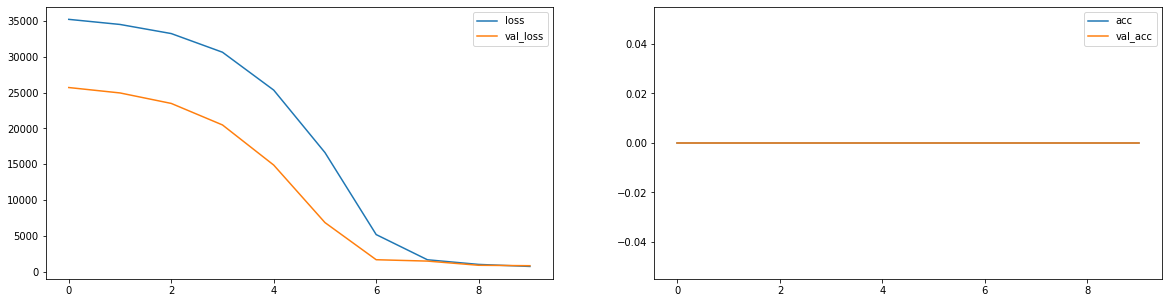

16/16 [==============================] - 2s 120ms/step - loss: 740.2232 - accuracy: 0.0000e+00 - val_loss: 843.7004 - val_accuracy: 0.0000e+00


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, batch_size = 8, epochs = 10,  callbacks=[plot_losses])

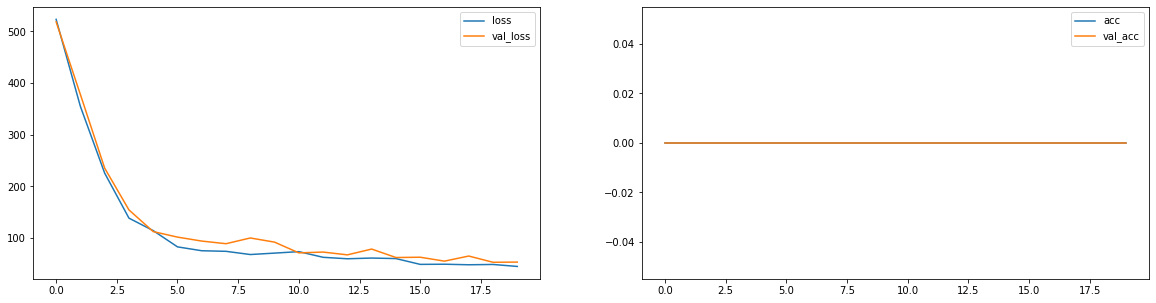

16/16 [==============================] - 2s 121ms/step - loss: 44.8706 - accuracy: 0.0000e+00 - val_loss: 53.2932 - val_accuracy: 0.0000e+00


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, batch_size = 8, epochs = 20,  callbacks=[plot_losses])

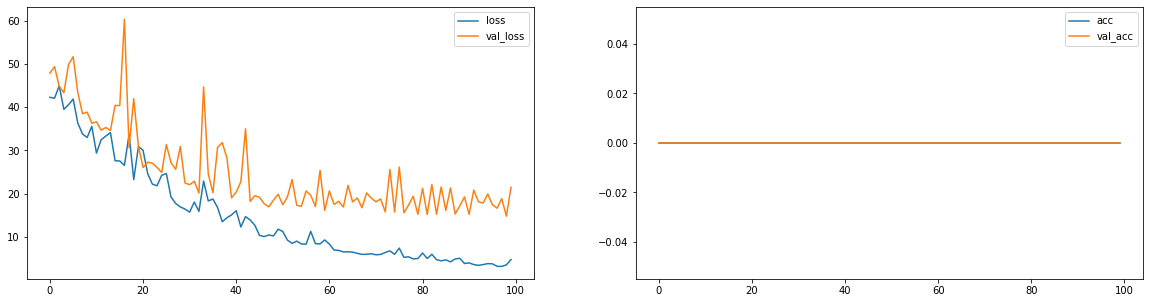

16/16 [==============================] - 2s 120ms/step - loss: 4.7521 - accuracy: 0.0000e+00 - val_loss: 21.4513 - val_accuracy: 0.0000e+00


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, batch_size = 8, epochs = 100,  callbacks=[plot_losses])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred.T[0] - y_test

array([  4.91569519,   1.99560547,  -4.62658691,   4.80258942,
        -6.36844635,   1.08880615,  -0.18052673,  -9.80749512,
         9.292099  ,   2.89233398,   5.27545166,   5.16448975,
        -7.9520874 ,   3.88124084,   4.43234253,   0.39794922,
         1.93254852,  -9.43190002,  -3.31769562,  -3.19508362,
        -2.31880188,   5.7164917 ,   5.46594238,   5.23997498,
         1.11006165,   1.13598633,   8.76724243,  -4.04495239,
        -0.84823608,   0.14898682,   6.55819702,  -0.14845276,
         6.83912659,  -3.56344604,  -1.0085144 , -10.08660889,
        -0.90208435,  -7.8170166 ,   2.13490295,   3.11106873])

In [ ]:
y_test

array([ 81, 277, 212,  96, 122, 100, 251, 218, 190, 177, 218, 238, 267,
       168, 306, 135,  96, 252,  98, 159, 159, 195, 100, 214, 250, 145,
       169, 206, 306, 278, 142, 104, 197, 280, 134, 255, 139, 145, 208,
       126])

In [ ]:
print(round(np.mean(np.abs(y_test-y_pred.T[0])),4))

4.1979


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred.T[0], y_test)
mse

26.127524131600513